<a href="https://colab.research.google.com/github/merrymasti015/CAP2022GRP09/blob/main/PCAMZC321_Group09_FireEventDetection_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import numpy as np
import numpy
print('numpy: {}'.format(np.__version__))
import cv2                                 # for capturing videos
print('cv2: {}'.format(cv2.__version__))

import os, os.path
from pathlib import Path
import math   # for mathematical operations


pandas: 1.3.5
numpy: 1.21.5
cv2: 4.1.2


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
!ls "/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Fire"

image_0.jpg    image_280.jpg  image_460.jpg  image_640.jpg  image_820.jpg
image_100.jpg  image_281.jpg  image_461.jpg  image_641.jpg  image_821.jpg
image_101.jpg  image_282.jpg  image_462.jpg  image_642.jpg  image_822.jpg
image_102.jpg  image_283.jpg  image_463.jpg  image_643.jpg  image_823.jpg
image_103.jpg  image_284.jpg  image_464.jpg  image_644.jpg  image_824.jpg
image_104.jpg  image_285.jpg  image_465.jpg  image_645.jpg  image_825.jpg
image_105.jpg  image_286.jpg  image_466.jpg  image_646.jpg  image_826.jpg
image_106.jpg  image_287.jpg  image_467.jpg  image_647.jpg  image_827.jpg
image_107.jpg  image_288.jpg  image_468.jpg  image_648.jpg  image_828.jpg
image_108.jpg  image_289.jpg  image_469.jpg  image_649.jpg  image_829.jpg
image_109.jpg  image_28.jpg   image_46.jpg   image_64.jpg   image_82.jpg
image_10.jpg   image_290.jpg  image_470.jpg  image_650.jpg  image_830.jpg
image_110.jpg  image_291.jpg  image_471.jpg  image_651.jpg  image_831.jpg
image_111.jpg  image_292.jpg  image_472

In [5]:
root_folder = "/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/"
print(root_folder)

/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/


In [6]:
ModelSave  = root_folder+"/ModelSave"
OutputFiles  = root_folder+"/OutputFiles"


   
if not os.path.exists(OutputFiles):
   os.makedirs(OutputFiles) 
if not os.path.exists(ModelSave):
   os.makedirs(ModelSave) 

print(ModelSave)
print(OutputFiles)

/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//ModelSave
/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//OutputFiles


In [7]:
os.listdir(root_folder)

['Fire', 'Neutral', 'OutputFiles', 'ModelSave']

In [8]:
sub_folders = [name for name in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, name))]

print(sub_folders)

['Fire', 'Neutral', 'OutputFiles', 'ModelSave']


In [9]:
for child in os.listdir(root_folder):
    if child == "ModelSave":
        continue
    if child == "OutputFiles":
        continue
        
    print(child)
   
    baseimagefolders = os.path.join(root_folder, child)
    if os.path.isdir(baseimagefolders):

        print(baseimagefolders)

Fire
/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Fire
Neutral
/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral


In [10]:
image_path_list = []

valid_vdo_extensions = [".jpg", ".jpeg", ".png", ".tif", ".tiff"] #specify your vald extensions here #specify vald extensions here
valid_vdo_extensions = [item.lower() for item in valid_vdo_extensions]
     
#create a list all files in directory and
#append files with a vaild extention to image_path_list
for file in os.listdir(baseimagefolders):  ### extract each vdo from a given folder
    #print(file)
    extension = os.path.splitext(file)[1] ### How to extract only extension of a vdo file
    if extension.lower() not in valid_vdo_extensions:
        continue
            
    # image_path_list contains list of all vdo files with full path bame of a given vdo folder
    image_path_list.append(os.path.join(baseimagefolders, file))
image_path_list

['/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral/N_image_161.jpg',
 '/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral/N_image_17.jpg',
 '/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral/N_image_169.jpg',
 '/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral/N_image_168.jpg',
 '/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral/N_image_167.jpg',
 '/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral/N_image_166.jpg',
 '/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral/N_image_163.jpg',
 '/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral/N_image_164.jpg',
 '/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral/N_image_162.jpg',
 '/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral/N_image_165.jpg',
 '/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral/N_image_540.jpg',
 '/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDat

In [11]:
def img_Framing_Process(child, imageDir):
#------------------
 

    # Following 3 variables - for final csv 
    frame_filename = []
    frame_image    = []
    frame_class    = []
    
    
   
    #  valid extensions of base image
    image_path_list = []

    valid_extensions = [".jpg", ".jpeg", ".png", ".tif", ".tiff"] #specify your vald extensions here #specify vald extensions here
    valid_extensions = [item.lower() for item in valid_extensions]
     
    #create a list all files in directory and
    #append files with a vaild extention to image_path_list
    for file in os.listdir(imageDir):  ### extract each image from a given folder
        #print(file)
        extension = os.path.splitext(file)[1] ### How to extract only extension of a vdo file
        if extension.lower() not in valid_extensions:
            continue
        # image_path_list contains list of all vdo files with full path name of a given vdo folder
        image_path_list.append(os.path.join(imageDir, file))
    #print(image_path_list)
    
    #loop through image_path_list to open each image
    for Imagefile in image_path_list:       
              
        #image = cv2.imread(imagePath)
        FIlenameOnly = os.path.basename(Imagefile)
        #print("FIlenameOnly :" , FIlenameOnly)
        ## storing the images and their class in a dataframe
        frame_filename.append(FIlenameOnly)  # Only filename
        #temp = Path(Imagefile).stem # Find file name without extension
        #Outimage = os.path.join(OutimageDir+Imagefile)
        Outimage = Imagefile
        #print("Outimage :" , Outimage)
        frame_image.append(Outimage)         # File Name with complete path
        # creating the class of image        # Class i.e. 
        #print("child :" , child)
        frame_class.append(child)

    # storing the images and their class in a dataframe
    train_data = pd.DataFrame()
    train_data['FrameFilename'] = frame_filename
    train_data['FullPathName'] = frame_image
    train_data['class'] = frame_class
    
    # converting the dataframe into csv file 
    #train_data.to_csv('C:/GG-16-03/CAP4/HumanActivityRecognition/Dataset/VDO/train_new.csv',header=True, index=False)
    return train_data

In [12]:
# Main script that call vdo_Framing_Process 

count = 0
for child in os.listdir(root_folder):
    if child == "ModelSave":
        continue
    if child == "OutputFiles":
        continue


    count = count + 1
    baseimagefolders = os.path.join(root_folder, child)
    if os.path.isdir(baseimagefolders):
        print("Processing Folder :" , baseimagefolders)
        #outImage  = FramesVdo
        
        
        ### Calling vdo_Framing_Process function
        #df = img_Framing_Process(child , baseimagefolders,outImage)
        df = img_Framing_Process(child , baseimagefolders)
        print(count)
        if (count == 1):  ### First iteration - copy function used to create df2 for csv
            df2 = df.copy()
        else:
            df2 = pd.concat([df2 , df])  ### all other iteration concat function to append df2
            
print(df2.shape)

# converting the dataframe into csv file 
#df2.to_csv('C:/GG-16-03/CAP4/HumanActivityRecognition/Dataset/VDO/Final_2vdoframeFile.csv',header=True, index=False)
df2.to_csv(OutputFiles+'/step0_frameFile.csv',header=True, index=False)


Processing Folder : /content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Fire
1
Processing Folder : /content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Neutral
2
(2009, 3)


In [13]:
df2.head()

,FrameFilename,FullPathName,class
0,image_898.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
1,image_96.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
2,image_894.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
3,image_895.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
4,image_876.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire


In [14]:
df2['Train_Test'] = df2['FrameFilename'].str[:1]
df2.head()

,FrameFilename,FullPathName,class,Train_Test
0,image_898.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire,i
1,image_96.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire,i
2,image_894.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire,i
3,image_895.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire,i
4,image_876.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire,i


In [15]:
df2.tail()

,FrameFilename,FullPathName,class,Train_Test
1004,TN_image_87.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Neutral,T
1005,TN_image_86.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Neutral,T
1006,N_image_819.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Neutral,N
1007,TN_image_99.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Neutral,T
1008,TN_image_98.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Neutral,T


In [16]:
df2.to_csv(OutputFiles+'/step0_frameFile.csv',header=True, index=False)

In [17]:
#Count Unique Values of occupation
df2['Train_Test'].value_counts()

N    909
i    900
T    200
Name: Train_Test, dtype: int64

In [18]:
# filter df2 where Train_Test   column value is 'T' - for Test data set 
Filter_Value = ['T']
Test_Data = df2[df2['Train_Test'].isin(Filter_Value)]
print(Test_Data)

        FrameFilename  ... Train_Test
900   TF_image_79.jpg  ...          T
901   TF_image_86.jpg  ...          T
902   TF_image_70.jpg  ...          T
903   TF_image_90.jpg  ...          T
904   TF_image_49.jpg  ...          T
...               ...  ...        ...
1003  TN_image_88.jpg  ...          T
1004  TN_image_87.jpg  ...          T
1005  TN_image_86.jpg  ...          T
1007  TN_image_99.jpg  ...          T
1008  TN_image_98.jpg  ...          T

[200 rows x 4 columns]


In [19]:
Test_Data.shape

(200, 4)

In [20]:
Test_Data.head()

,FrameFilename,FullPathName,class,Train_Test
900,TF_image_79.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire,T
901,TF_image_86.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire,T
902,TF_image_70.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire,T
903,TF_image_90.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire,T
904,TF_image_49.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire,T


In [21]:
testSetframelist = Test_Data["FrameFilename"].tolist()
testSetframelist

['TF_image_79.jpg',
 'TF_image_86.jpg',
 'TF_image_70.jpg',
 'TF_image_90.jpg',
 'TF_image_49.jpg',
 'TF_image_7.jpg',
 'TF_image_76.jpg',
 'TF_image_75.jpg',
 'TF_image_46.jpg',
 'TF_image_81.jpg',
 'TF_image_94.jpg',
 'TF_image_83.jpg',
 'TF_image_78.jpg',
 'TF_image_92.jpg',
 'TF_image_98.jpg',
 'TF_image_96.jpg',
 'TF_image_73.jpg',
 'TF_image_67.jpg',
 'TF_image_95.jpg',
 'TF_image_80.jpg',
 'TF_image_52.jpg',
 'TF_image_9.jpg',
 'TF_image_71.jpg',
 'TF_image_97.jpg',
 'TF_image_57.jpg',
 'TF_image_82.jpg',
 'TF_image_91.jpg',
 'TF_image_88.jpg',
 'TF_image_69.jpg',
 'TF_image_68.jpg',
 'TF_image_48.jpg',
 'TF_image_99.jpg',
 'TF_image_89.jpg',
 'TF_image_84.jpg',
 'TF_image_85.jpg',
 'TF_image_77.jpg',
 'TF_image_87.jpg',
 'TF_image_8.jpg',
 'TF_image_72.jpg',
 'TF_image_53.jpg',
 'TF_image_93.jpg',
 'TF_image_61.jpg',
 'TF_image_74.jpg',
 'TF_image_55.jpg',
 'TF_image_64.jpg',
 'TF_image_32.jpg',
 'TF_image_40.jpg',
 'TF_image_66.jpg',
 'TF_image_59.jpg',
 'TF_image_20.jpg',
 'T

In [22]:
# For train frame - all rows except (~) the test  list
Train_Data = df2[~df2['FrameFilename'].isin(testSetframelist)]

In [23]:
print(Train_Data)

        FrameFilename  ... Train_Test
0       image_898.jpg  ...          i
1        image_96.jpg  ...          i
2       image_894.jpg  ...          i
3       image_895.jpg  ...          i
4       image_876.jpg  ...          i
...               ...  ...        ...
999   N_image_821.jpg  ...          N
1000  N_image_824.jpg  ...          N
1001  N_image_822.jpg  ...          N
1002   N_image_82.jpg  ...          N
1006  N_image_819.jpg  ...          N

[1809 rows x 4 columns]


In [24]:
# Drop column Train_Test from both Train_Data and Test_Data

# Remove column name 'Train_Test'
Train_Data = Train_Data.drop(['Train_Test'], axis = 1)
Test_Data = Test_Data.drop(['Train_Test'], axis = 1)

In [25]:
print(Train_Data.shape)
print(Test_Data.shape)

(1809, 3)
(200, 3)


In [26]:
###  Validate 

df2['Train_Test'].value_counts()

N    909
i    900
T    200
Name: Train_Test, dtype: int64

In [27]:
Train_Data.reset_index(drop=True)
Test_Data.reset_index(drop=True)

,FrameFilename,FullPathName,class
0,TF_image_79.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
1,TF_image_86.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
2,TF_image_70.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
3,TF_image_90.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
4,TF_image_49.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
...,...,...,...
195,TN_image_88.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Neutral
196,TN_image_87.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Neutral
197,TN_image_86.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Neutral
198,TN_image_99.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Neutral


In [28]:
Train_Data.to_csv(OutputFiles+'/trainFrames.csv',header=True, index=False)
Test_Data.to_csv(OutputFiles+'/testFrames.csv',header=True, index=False)

In [29]:
print(root_folder)
print(OutputFiles)

/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/
/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//OutputFiles


In [30]:
## Read Train Data and Test data
Train_Data = pd.read_csv (OutputFiles + '/trainFrames.csv')
Test_Data  = pd.read_csv (OutputFiles + '/testFrames.csv')

In [31]:
#### Ignore Dark and Blur image for model training and test
BlurFrames  = OutputFiles+"/BlurFrames"
BaseDataSet  = OutputFiles+"/BaseDataSet"
Fire = BaseDataSet+"/Train"
TrainFire = Fire+"/Fire"
TrainNeutral = Fire+"/Neutral"

Neutral = BaseDataSet+"/Test"
TestFire = Neutral+"/Fire"
TesNeutral = Neutral+"/Neutral"



if not os.path.exists(BlurFrames):
   os.makedirs(BlurFrames) 
   
if not os.path.exists(BaseDataSet):
   os.makedirs(BaseDataSet) 

if not os.path.exists(Fire):
   os.makedirs(Fire) 

if not os.path.exists(TrainFire):
   os.makedirs(TrainFire) 

if not os.path.exists(TestFire):
   os.makedirs(TestFire) 

if not os.path.exists(Neutral):
   os.makedirs(Neutral) 

if not os.path.exists(TrainNeutral):
   os.makedirs(TrainNeutral) 

if not os.path.exists(TesNeutral):
   os.makedirs(TesNeutral) 



print(TrainFire)
print(TrainNeutral)

/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//OutputFiles/BaseDataSet/Train/Fire
/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//OutputFiles/BaseDataSet/Train/Neutral


In [32]:
GreyBaseDataSet  = OutputFiles+"/GreyBaseDataSet"
GreyFire = GreyBaseDataSet+"/Train"
TrainGreyFire = GreyFire+"/Fire"
TrainGreyNeutral = GreyFire+"/Neutral"

GreyNeutral = GreyBaseDataSet+"/Test"
TestGreyFire = GreyNeutral+"/Fire"
TestGreyNeutral = GreyNeutral+"/Neutral"


if not os.path.exists(GreyBaseDataSet):
   os.makedirs(GreyBaseDataSet) 

if not os.path.exists(GreyFire):
   os.makedirs(GreyFire) 

if not os.path.exists(TrainGreyFire):
   os.makedirs(TrainGreyFire) 

if not os.path.exists(TestGreyFire):
   os.makedirs(TestGreyFire) 

if not os.path.exists(GreyNeutral):
   os.makedirs(GreyNeutral) 

if not os.path.exists(TrainGreyNeutral):
   os.makedirs(TrainGreyNeutral) 

if not os.path.exists(TestGreyNeutral):
   os.makedirs(TestGreyNeutral) 

In [33]:
print(TrainGreyFire)
print(TrainGreyNeutral)

/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//OutputFiles/GreyBaseDataSet/Train/Fire
/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//OutputFiles/GreyBaseDataSet/Train/Neutral


In [34]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()
## Function return as value the average variance of the edges in an image. The higher the number, the sharper the edge is.

In [35]:
from tqdm import tqdm  #tqdm is a library in Python which is used for creating Progress Meters or Progress Bars.

In [36]:
Train_Data.shape

(1809, 3)

In [37]:
o=Train_Data['FullPathName'][0]
print(o)  

/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Fire/image_898.jpg


In [38]:
kountg = 0
kount = 0
darkImagecount = 0
thvalue = 100  # In general, the threshold value gives very good results at 100.
# That differs from image to image, it depends on the camera you’re using and on the content of the pictures.


# Following variables - for final csv 
frame_filename = []
frameFile_Path    = []
GreyframeFile_Path = []
frame_class    = []
trainOrTest    = []


# for loop to read and store frames
for i in tqdm(range(Train_Data.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    # three-dimensional array containing the red, green, and blue pixel intensities. 
    #Image has been reformated to be 224-by-224 pixels in size.
    
    
    img = cv2.imread(Train_Data['FullPathName'][i])
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grey inage  
    
    if img is None:
        result = "Image is empty!!"
        print(result)
        print(Train_Data['FullPathName'][i])
        continue
        
    ## If image is dark - By pass 
    if np.average(img_grey) < 20:  ## if it dark image , skip 
        # skips an iteration, so the frame isn't saved
        result = "Dark Image!!"
        print(result)
        #print(Train_Data['FullPathName'][i])
        darkImagecount =  darkImagecount + 1
        continue


    fm = variance_of_laplacian(img_grey)  # Use grey image 
    #text = "Not Blurry"
    if fm < thvalue:
        kount = kount+1
        #text = "Blurry"
        #write to blurimage folder
        # Saving the image
        x= Train_Data['FullPathName'][i]
        #print(x)
        baseFileName = os.path.basename(x)
        #print(baseFileName)
        FinalPath= os.path.join(BlurFrames,baseFileName)
        #print(FinalPath)
        cv2.imwrite(FinalPath, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
        continue 
    else:
        kountg = kountg+1
        # write to grey image folder
        # Saving the image
        x= Train_Data['FullPathName'][i]
        #print(x)
        baseFileName = os.path.basename(x)
        #print(baseFileName)
        
        #FinalPath= os.path.join(GreyFrames,"Grey"+baseFileName)
        ### Now split Fire and Neutral
        if Train_Data['class'][i] == "Fire":
            c_FinalPath= os.path.join(TrainFire,baseFileName)
            cv2.imwrite(c_FinalPath, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
            
            
            FinalPath= os.path.join(TrainGreyFire,"Grey"+baseFileName)
            cv2.imwrite(FinalPath, img_grey, [cv2.IMWRITE_JPEG_QUALITY, 50])
            
            
        else:
            c_FinalPath= os.path.join(TrainNeutral,baseFileName)
            cv2.imwrite(c_FinalPath, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
            FinalPath= os.path.join(TrainGreyNeutral,"Grey"+baseFileName)
            cv2.imwrite(FinalPath, img_grey, [cv2.IMWRITE_JPEG_QUALITY, 50])
            

            
        frame_filename.append(Train_Data['FrameFilename'][i])  # Only filename
        frameFile_Path.append(c_FinalPath)  # # File Name with complete path
           
        GreyframeFile_Path.append(FinalPath)  # # Grey File Frame Name with complete path
        frame_class.append(Train_Data['class'][i])  # # # Class i.e. Fire or Neutral
            
            
# storing the images and their class in a dataframe
FramePathLocation = pd.DataFrame()
FramePathLocation['FrameFilename'] = frame_filename
FramePathLocation['FullPathName'] = frameFile_Path
FramePathLocation['GreyFullPathName'] = GreyframeFile_Path
FramePathLocation['class'] = frame_class
          
            

print(kount)
print(kountg)
print(darkImagecount)

  9%|▉         | 170/1809 [00:07<01:03, 25.66it/s]

Dark Image!!


 10%|█         | 186/1809 [00:07<00:49, 32.55it/s]

Dark Image!!


 12%|█▏        | 212/1809 [00:08<00:47, 33.76it/s]

Dark Image!!


 35%|███▍      | 632/1809 [00:20<00:25, 45.62it/s]

Dark Image!!


 36%|███▋      | 658/1809 [00:21<00:25, 44.36it/s]

Dark Image!!


 42%|████▏     | 755/1809 [00:23<00:22, 45.94it/s]

Dark Image!!


 47%|████▋     | 845/1809 [00:25<00:21, 45.65it/s]

Dark Image!!


100%|██████████| 1809/1809 [11:59<00:00,  2.51it/s]

27
1775
7


In [39]:
FramePathLocation.head()

,FrameFilename,FullPathName,GreyFullPathName,class
0,image_898.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
1,image_96.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
2,image_894.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
3,image_895.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
4,image_876.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire


In [40]:
FramePathLocation.shape

(1775, 4)

In [41]:
Test_Data.shape

(200, 3)

In [42]:
o=Test_Data['FullPathName'][0]
print(o)  

/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Fire/TF_image_79.jpg


In [43]:
kountg = 0
kount = 0
darkImagecount = 0
thvalue = 100  # In general, the threshold value gives very good results at 100.
# That differs from image to image, it depends on the camera you’re using and on the content of the pictures.


# Following variables - for final csv 
frame_filename = []
frameFile_Path    = []
GreyframeFile_Path = []
frame_class    = []
trainOrTest    = []


# for loop to read and store frames
for i in tqdm(range(Test_Data.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    # three-dimensional array containing the red, green, and blue pixel intensities. 
    #Image has been reformated to be 224-by-224 pixels in size.
    
    
    img = cv2.imread(Test_Data['FullPathName'][i])
    img_grey = cv2.cvtColor(img,  cv2.COLOR_BGR2GRAY)  # Convert to grey inage  
   
    
    if img is None:
        result = "Image is empty!!"
        print(result)
        print(Test_Data['FullPathName'][i])
        continue
        
    ## If image is dark - By pass 
    if np.average(img_grey) < 20:  ## if it dark image , skip 
        # skips an iteration, so the frame isn't saved
        result = "Dark Image!!"
        print(result)
        #print(Test_Data['FullPathName'][i])
        darkImagecount =  darkImagecount + 1
        continue


    fm = variance_of_laplacian(img_grey)  # Use grey image 
    #text = "Not Blurry"
    if fm < thvalue:
        kount = kount+1
        #text = "Blurry"
        #write to blurimage folder
        # Saving the image
        x= Test_Data['FullPathName'][i]
        #print(x)
        baseFileName = os.path.basename(x)
        #print(baseFileName)
        FinalPath= os.path.join(BlurFrames,baseFileName)
        #print(FinalPath)
        cv2.imwrite(FinalPath, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
        continue 
    else:
        kountg = kountg+1
        # write to grey image folder
        # Saving the image
        x= Test_Data['FullPathName'][i]
        #print(x)
        baseFileName = os.path.basename(x)
        #print(baseFileName)
        
        #FinalPath= os.path.join(GreyFrames,"Grey"+baseFileName)

        ### Now split Fire and Neutral
        if Test_Data['class'][i] == "Fire":
            c_FinalPath= os.path.join(TestFire,baseFileName)
            cv2.imwrite(c_FinalPath, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
            
            
            FinalPath= os.path.join(TestGreyFire,"Grey"+baseFileName)
            cv2.imwrite(FinalPath, img_grey, [cv2.IMWRITE_JPEG_QUALITY, 50])
            
            
        else:
            c_FinalPath= os.path.join(TesNeutral,baseFileName)
            cv2.imwrite(c_FinalPath, img, [cv2.IMWRITE_JPEG_QUALITY, 50])
            FinalPath= os.path.join(TestGreyNeutral,"Grey"+baseFileName)
            cv2.imwrite(FinalPath, img_grey, [cv2.IMWRITE_JPEG_QUALITY, 50])
            

            
        frame_filename.append(Test_Data['FrameFilename'][i])  # Only filename
        frameFile_Path.append(c_FinalPath)  # # File Name with complete path
           
        GreyframeFile_Path.append(FinalPath)  # # Grey File Frame Name with complete path
        frame_class.append(Test_Data['class'][i])  # # # Class i.e. Fire or Neutral
            
            
# storing the images and their class in a dataframe
FramePathLocation = pd.DataFrame()
FramePathLocation['FrameFilename'] = frame_filename
FramePathLocation['FullPathName'] = frameFile_Path
FramePathLocation['GreyFullPathName'] = GreyframeFile_Path
FramePathLocation['class'] = frame_class
          
            

print(kount)
print(kountg)
print(darkImagecount)

 98%|█████████▊| 196/200 [02:13<00:06,  1.65s/it]

Dark Image!!


 98%|█████████▊| 197/200 [02:14<00:05,  1.67s/it]

Dark Image!!


100%|██████████| 200/200 [02:19<00:00,  1.43it/s]

11
187
2


In [44]:
FramePathLocation.shape

(187, 4)

In [45]:
# converting the dataframe into csv file 

FramePathLocation.to_csv(OutputFiles+'/Test_FramePathLocation.csv',header=True, index=False)

# **Data visualizations**


This function helps to visualize images in test and train set in various categories Find image size (width, height)

Function to present the images

In [46]:
from PIL import Image             # Python Image Library 
import matplotlib.pyplot as plt   # Making plots 
import matplotlib.image as mpimg  # To view color image 
%matplotlib inline

In [47]:
TrainFire

'/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//OutputFiles/BaseDataSet/Train/Fire'

In [48]:
TrainNeutral

'/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//OutputFiles/BaseDataSet/Train/Neutral'

In [49]:
def image_collage(path, n_rows, n_cols, title,imageType):
    
    '''This function selects the first few images from given 
    path and presents in the collage form. 
    path is the directory from which images are taken. 
    n_rows and n_cols are rows and column of the collage. 
    title is the title of the collage.
    imageType - to indicate colur(C) or grey (G)'''
    
    # Initiating the plot 
    fig = plt.figure()
    plt.title(title)
    
    # Turns off axis from the collage (total plot)
    plt.axis('Off')
    
    # List of all images in the path
    img_list = os.listdir(path)

    img_num = 1
    for img in img_list[:n_rows*n_cols]:
        
        # directroies of the choosen images 
        img_path = os.path.join(path, img)
        
        # showing the color images 
        #img_read = mpimg.imread(img_path)
        img_read = mpimg.imread(img_path)
        
        if imageType == 'C':
            
           #Get image size (width, height) 
            h, w, c = img_read.shape
            print('Image:  ', img)
            print('width:  ', w)
            print('height: ', h)
            print('channel:', c)
        else:
            h, w  = img_read.shape
            print('Image:  ', img)
            print('width:  ', w)
            print('height: ', h)
            
            
            

        
        # collage is formed from subplot
        ax = fig.add_subplot(n_rows, n_cols, img_num)
        img_num += 1
        
        # displaying image in subplot 
        ax.imshow(img_read)
        
        # turns off the axis from individual image in the collage
        ax.axis('Off')

Image:   image_898.jpg
width:   266
height:  189
channel: 3
Image:   image_96.jpg
width:   300
height:  168
channel: 3
Image:   image_894.jpg
width:   282
height:  178
channel: 3
Image:   image_895.jpg
width:   300
height:  168
channel: 3
Image:   image_876.jpg
width:   293
height:  172
channel: 3
Image:   image_93.jpg
width:   291
height:  173
channel: 3
Image:   image_89.jpg
width:   292
height:  173
channel: 3
Image:   image_893.jpg
width:   299
height:  168
channel: 3
Image:   image_888.jpg
width:   300
height:  168
channel: 3
Image:   image_92.jpg
width:   310
height:  163
channel: 3
Image:   image_99.jpg
width:   327
height:  154
channel: 3
Image:   image_877.jpg
width:   259
height:  194
channel: 3
Image:   N_image_161.jpg
width:   290
height:  174
channel: 3
Image:   N_image_17.jpg
width:   300
height:  168
channel: 3
Image:   N_image_169.jpg
width:   300
height:  168
channel: 3
Image:   N_image_168.jpg
width:   183
height:  275
channel: 3
Image:   N_image_167.jpg
width:   299


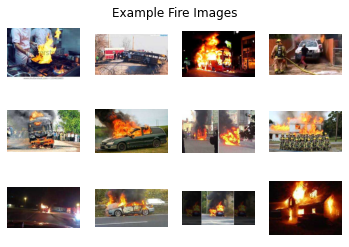

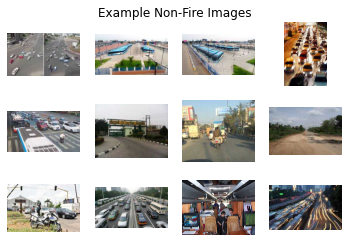

In [50]:
ImageType = 'C' # Colour image
image_collage(TrainFire, 3, 4, 'Example Fire Images' , ImageType)
image_collage(TrainNeutral, 3, 4, 'Example Non-Fire Images',ImageType)

In [51]:
TrainGreyFire

'/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//OutputFiles/GreyBaseDataSet/Train/Fire'

In [52]:
TrainGreyNeutral

'/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//OutputFiles/GreyBaseDataSet/Train/Neutral'

In [53]:
ImageType = 'G' # Gray image

Image:   Greyimage_898.jpg
width:   266
height:  189
Image:   Greyimage_96.jpg
width:   300
height:  168
Image:   Greyimage_894.jpg
width:   282
height:  178
Image:   Greyimage_895.jpg
width:   300
height:  168
Image:   Greyimage_876.jpg
width:   293
height:  172
Image:   Greyimage_93.jpg
width:   291
height:  173
Image:   Greyimage_89.jpg
width:   292
height:  173
Image:   Greyimage_893.jpg
width:   299
height:  168
Image:   Greyimage_888.jpg
width:   300
height:  168
Image:   Greyimage_92.jpg
width:   310
height:  163
Image:   Greyimage_99.jpg
width:   327
height:  154
Image:   Greyimage_877.jpg
width:   259
height:  194
Image:   GreyN_image_161.jpg
width:   290
height:  174
Image:   GreyN_image_17.jpg
width:   300
height:  168
Image:   GreyN_image_169.jpg
width:   300
height:  168
Image:   GreyN_image_168.jpg
width:   183
height:  275
Image:   GreyN_image_167.jpg
width:   299
height:  168
Image:   GreyN_image_166.jpg
width:   259
height:  195
Image:   GreyN_image_163.jpg
width:   24

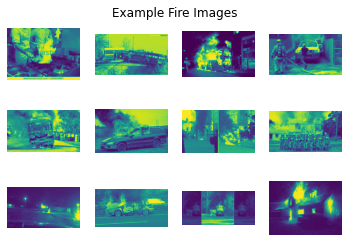

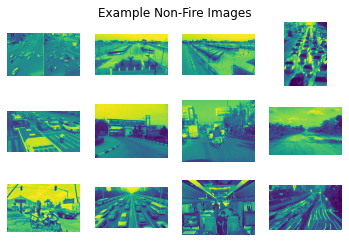

In [54]:
image_collage(TrainGreyFire, 3, 4, 'Example Fire Images',ImageType)
image_collage(TrainGreyNeutral, 3, 4, 'Example Non-Fire Images',ImageType )

# Now that we have created the target directories and segregated the test and train and all the folders lets start from this point so that we do not need to go back to the prep part again

In [2]:
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import numpy as np
import numpy
print('numpy: {}'.format(np.__version__))
import cv2                                 # for capturing videos
print('cv2: {}'.format(cv2.__version__))

import os, os.path
from pathlib import Path
import math   # for mathematical operations

pandas: 1.3.5
numpy: 1.21.5
cv2: 4.1.2


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_folder = "/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/"
ModelSave  = root_folder+"/ModelSave"
OutputFiles  = root_folder+"/OutputFiles"


Mounted at /content/gdrive


In [4]:
import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import pickle

import time

import seaborn as sns

In [5]:
print(ModelSave)
print(OutputFiles)

/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//ModelSave
/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet//OutputFiles


In [9]:
trainFrames  = pd.read_csv(OutputFiles+"/trainFrames.csv")

In [10]:
trainFrames.head()

,FrameFilename,FullPathName,class
0,image_898.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
1,image_96.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
2,image_894.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
3,image_895.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire
4,image_876.jpg,/content/gdrive/MyDrive/Colab_Notebooks/Fire_I...,Fire


In [11]:
trainFrames.shape

(1809, 3)

In [12]:
#Count Unique Values of occupation
trainFrames['class'].value_counts()

Neutral    909
Fire       900
Name: class, dtype: int64

In [13]:
#Check the distribution of a Column in terms of %
def Column_Distribution(df, column):
   
    label_distrb = 100*df.groupby(column).agg({column: "count"})/len(df)
    label_distrb.columns = ['Distribution %'] 
    return label_distrb

         Distribution %
class                  
Fire          49.751244
Neutral       50.248756


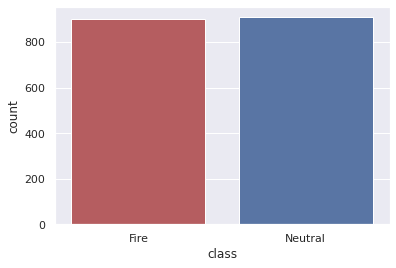

In [14]:
#Find % of class
#Calling Column_Distribution function to check the % of Label distribution
class_distrb =Column_Distribution(trainFrames,'class')
print(class_distrb)


sns.set()

sns.countplot(x ="class", data=trainFrames, palette=['r','b']);

In [31]:
# Get the unique values of 'class' column - How many distinct classes
model_class = trainFrames['class'].unique().tolist()
print(model_class)
model_output_size = len(model_class)
print(model_output_size)

['Fire', 'Neutral']
2


In [32]:
trainFrames.shape[0]

1809

In [33]:
trainFrames['FullPathName'][0]

'/content/gdrive/MyDrive/Colab_Notebooks/Fire_ImageDataSet/Fire/image_898.jpg'

In [34]:
from glob import glob
from scipy import stats as s

In [35]:
train_image = []

# for loop to read and store frames
for i in tqdm(range(trainFrames.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    # three-dimensional array containing the red, green, and blue pixel intensities. 
    #Image has been reformated to be 224-by-224 pixels in size.
    img = image.load_img(trainFrames['FullPathName'][i], target_size=(224,224,3))
    #print(img.shape)
    # converting it to array
    img = image.img_to_array(img)
    
    # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
    img = img/255
    # appending the image to the train_image list
    train_image.append(img)
    
# converting the list to numpy array
X = np.array(train_image)

# shape of the array
X.shape

100%|██████████| 1809/1809 [07:14<00:00,  4.17it/s]


(1809, 224, 224, 3)

In [36]:
# make sure that the distribution of each class is similar in both training and validation sets. 
# We can use the stratify parameter to ensure that the distribution of data is same as the strata of the data

# separating the targetcate
y = trainFrames['class']

# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)

In [37]:
print(X_train.shape)
print(X_test.shape)

(1447, 224, 224, 3)
(362, 224, 224, 3)


In [38]:
# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

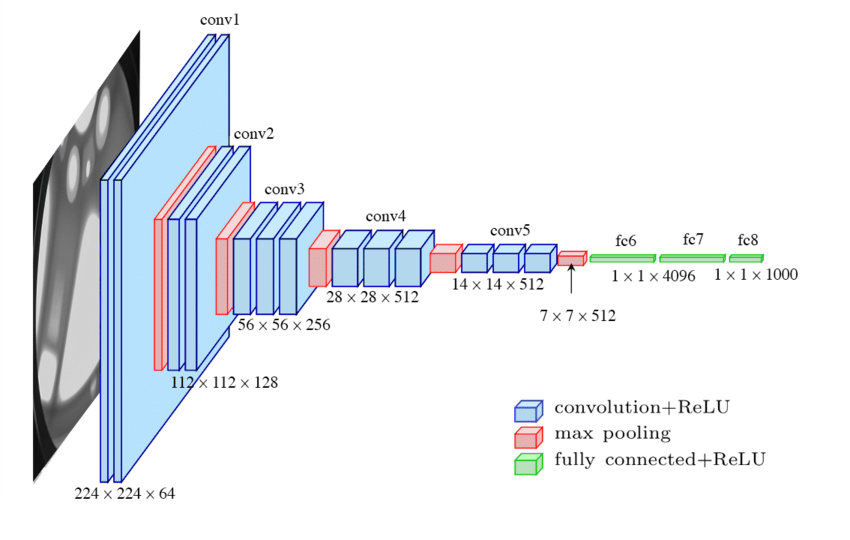

In [40]:
from IPython import display
display.Image("/content/gdrive/MyDrive/VGG-16-network-architecture.png")

**Keras provides a set of state-of-the-art deep learning models along with pre-trained weights on ImageNet. These pre-trained models can be used for image classification, feature extraction, and transfer learning, VGG16 refers to a VGG model with 16 weight layers, and VGG19 refers to a VGG model with 19 weight layers.**
<br><br>
1. The input layer takes an image in the size of (224 x 224 x 3), and the output layer is a softmax prediction on classes.

2. From the input layer to the last max pooling layer (labeled by 7 x 7 x 512) is regarded as the feature extraction part of the model,

3. Rest of the network is regarded as the classification part of the model. 


# VGG-16 pre-trained model will be used
https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

**creating the base model of pre-trained VGG16 model
When loading a given model, If we set “include_top” = False, that means the fully-connected output layers of the model used to make predictions is not loaded, allowing a new output layer to be added and trained.**

In [41]:

# creating the base model of pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

### set include_top = False it overlooks the last 3 Fully Connected(FC) layers 

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
%%time
# extracting features for training frames
X_train = base_model.predict(X_train)
X_train.shape